In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
from datasets import load_dataset

In [3]:
sst2 = load_dataset("sst")

No config specified, defaulting to: sst/default


Generating train split:   0%|          | 0/8544 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1101 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2210 [00:00<?, ? examples/s]

Dataset sst downloaded and prepared to /home/yz709/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
sst2_path = "./datasets/sst2"
sst2.save_to_disk(sst2_path)

In [8]:
sst2_train = sst2['train']
sst2_val = sst2['validation']
sst2_test = sst2['test']

### Check dataset is balanced

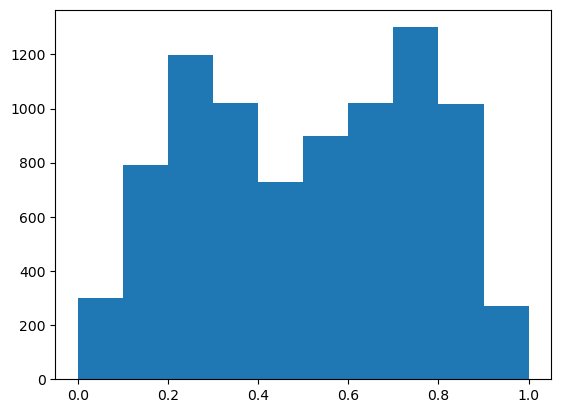

In [17]:
import matplotlib.pyplot as plt
plt.hist(sst2_train['label'])
plt.show()

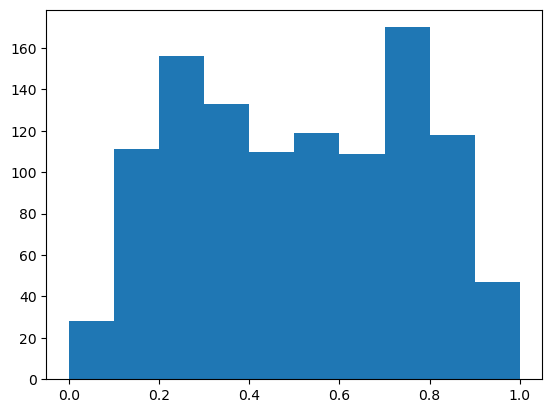

In [18]:
plt.hist(sst2_val['label'])
plt.show()

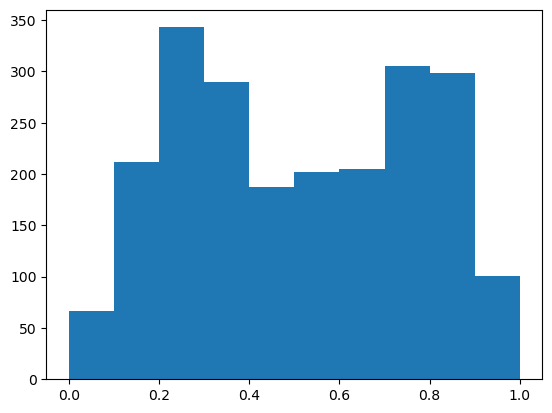

In [19]:
plt.hist(sst2_test['label'])
plt.show()

In [20]:
from transformers import AutoTokenizer, AutoModel, AutoConfig

In [25]:
PLM = "bert-base-cased"

In [26]:
tokenizer = AutoTokenizer.from_pretrained(PLM)

In [27]:
data = sst2_train

In [28]:
data    

Dataset({
    features: ['sentence', 'label', 'tokens', 'tree'],
    num_rows: 8544
})

In [34]:
max_length = min(512, max([len(text['sentence']) for text in data]))

In [35]:
data_row = data[0]
sentence = data_row['sentence']
label = data_row['label']
encoding = tokenizer.encode_plus(
    sentence,
    add_special_tokens=True,
    max_length=max_length,
    return_token_type_ids=False,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt',
)

In [40]:
label=torch.FloatTensor([label])
label

tensor([0.6944])

In [37]:
encoding["input_ids"].flatten()

tensor([  101,  1109,  2977,  1110, 17348,  1106,  1129,  1103,  6880,  5944,
          112,   188,  1207,   169,   169, 17727,   112,   112,  1105,  1115,
         1119,   112,   188,  1280,  1106,  1294,   170, 24194,  1256,  3407,
         1190,  7296, 20452, 24156, 11819,  7582,  9146,   117,  2893,   118,
          140, 15554,  1181,  3605,  8732,  3263,  1137,  6536, 17979,  1233,
          119,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
return dict(
            comment_text=comment_text,
            input_ids=encoding["input_ids"].flatten(),
            attention_mask=encoding["attention_mask"].flatten(),
            labels=torch.FloatTensor(labels)
        )